Here's a translation of PyMC's [GLM example](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html):

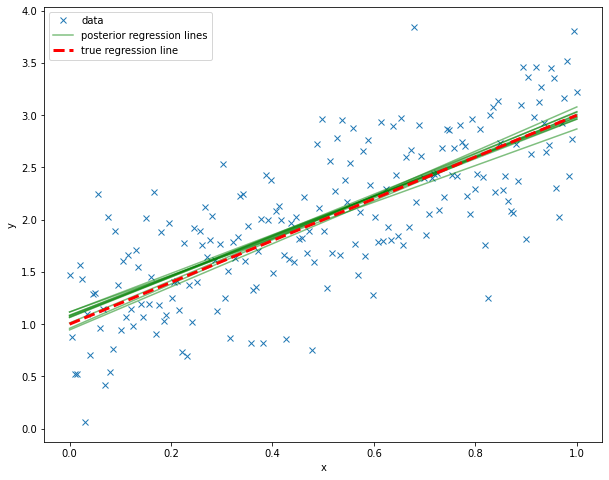

In [6]:
# import stuff
from pangolin import d, t, Given, I, IID, vmap, recurse, scan, sample, E, P, var, std, cov, corr, jags_code, makerv
from matplotlib import pyplot as plt
import numpy as np

# params
size = 200
true_intercept = 1
true_slope = 2

# generate data (all just numpy)
x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
y_obs = true_regression_line + 0.5*np.random.randn(size)

# helper function to make digaonal normal with fixed precision
diag_norm = lambda mean, prec: vmap(d.norm,[True,False])(mean,prec)

# define model
sigma     = d.exp(1) # PyMC uses a halfcauchy
intercept = d.norm(0,1/np.sqrt(20))
slope     = d.norm(0,1/np.sqrt(20))
mean      = intercept + slope*x
y         = diag_norm(mean, 1/sigma**0.5)

# get samples
means = sample(mean,Given(y==y_obs))

# plot
plt.figure(figsize=(10,8))
plt.plot(x,y_obs,'x',label='data')
for i,mean_i in enumerate(means[::100,:]):
    plt.plot(x,mean_i,'g-',alpha=0.5, label="posterior regression lines" if i==0 else None);
plt.plot(x,true_regression_line,'r--',linewidth=3,label='true regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();